# **Load Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import random
import os
import glob
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten,BatchNormalization
from keras.callbacks import EarlyStopping
from keras import optimizers

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load Satation Data**

In [177]:
!rm *

rm: cannot remove 'drive': Is a directory
rm: cannot remove 'sample_data': Is a directory


In [178]:
dir = '/content/drive/MyDrive/CMIP6_Article/wavelet_Result/wavelet_Result_Based_on_Station/'
name_st = 'MAGSOOD BEIG'
file_pass = f'wavelet_{name_st}.xlsx'

In [179]:
data = pd.read_excel(dir+file_pass).drop('Unnamed: 0', axis=1)
# data.dropna(inplace=True)
data

,year,month,obs,model1_1,model1_2,model1_3,model1_4,model1_5,model2_1,model2_2,...,model4_1,model4_2,model4_3,model4_4,model4_5,model5_1,model5_2,model5_3,model5_4,model5_5
0,1970,3,8.0,11.57600,12.9990,7.9022,10.1740,14.412,12.14200,12.5040,...,24.3490,25.475000,15.6100,21.117,20.624,9.60640,11.1080,4.767500,14.824,15.890
1,1970,4,37.5,10.58200,9.9189,5.3720,9.4311,14.429,12.00500,10.6340,...,20.8400,19.336000,10.6280,20.068,20.264,8.87600,8.5587,1.073700,14.922,16.170
2,1970,5,6.0,10.42400,6.7780,3.1804,8.8202,14.456,12.44900,8.7425,...,18.0630,12.997000,6.2032,19.097,19.938,8.99190,6.0572,-1.996100,15.026,16.426
3,1970,6,0.0,5.01470,4.5314,3.5209,8.9270,14.530,6.30900,6.2086,...,8.7679,8.376200,6.4279,18.583,19.772,4.54030,3.9382,-0.066615,15.178,16.572
4,1970,7,0.0,-0.89428,3.3282,5.0032,9.3708,14.628,-0.34979,4.6391,...,-0.7115,5.604600,8.7551,18.286,19.687,0.19439,3.1066,4.128100,15.351,16.662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,2014,8,0.0,-4.71300,6.0302,20.7300,22.9780,27.754,-4.97400,10.3950,...,-4.2831,2.502500,11.0910,11.544,13.185,-2.48490,4.1140,14.748000,11.201,13.748
534,2014,9,5.5,-9.58640,11.2280,24.1960,24.7540,28.268,0.41861,6.2365,...,-1.5890,0.079514,10.7340,11.401,12.817,-2.27600,1.5368,13.268000,10.885,13.259
535,2014,10,6.0,19.99500,20.8330,28.1250,26.1570,28.748,18.48700,12.7390,...,5.0111,2.170700,10.3020,11.237,12.472,5.23660,2.4293,11.621000,10.587,12.802
536,2014,11,28.0,55.78000,30.9920,32.0580,27.5580,29.222,38.26000,22.1890,...,12.2610,5.646500,9.8947,11.084,12.130,14.66200,4.5413,10.003000,10.312,12.349


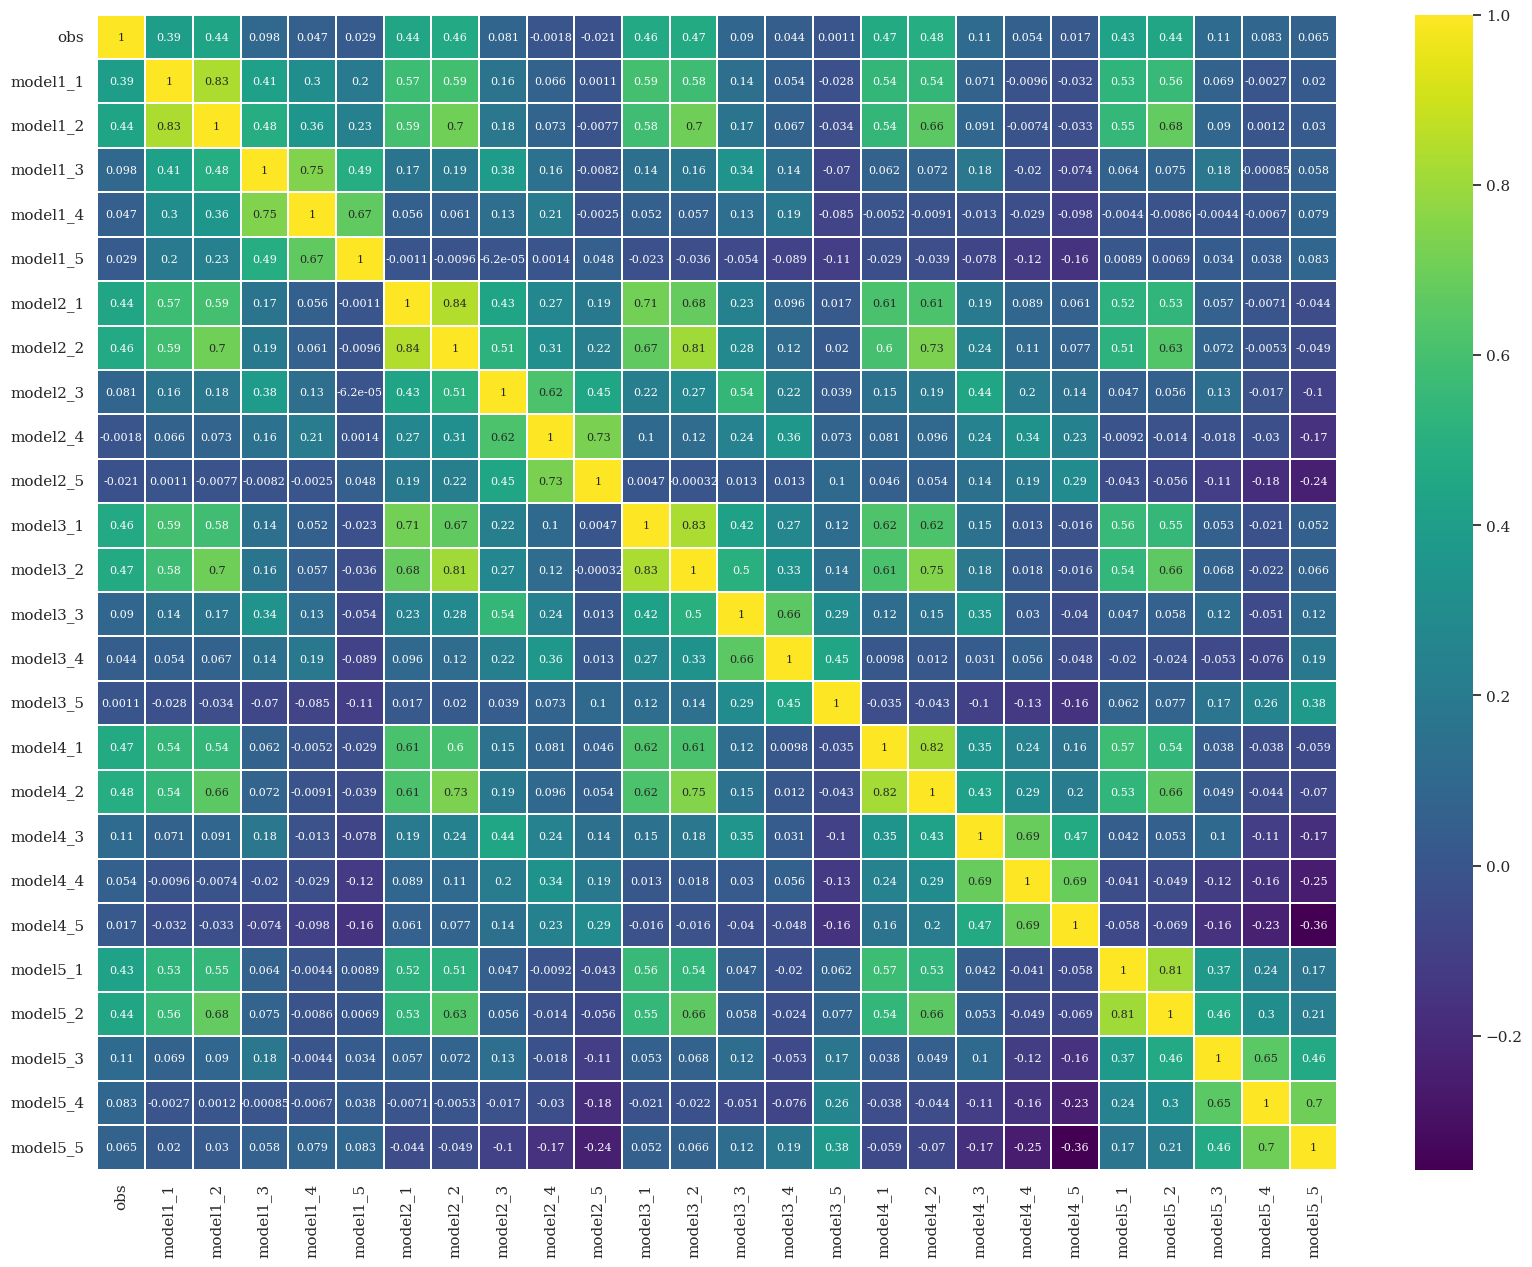

In [180]:
from matplotlib import rcParams
sns.set()
sns.set(font='serif')
rcParams['figure.figsize'] = 20, 15
df_heatmap = data.drop(['month', 'year'], axis=1)
fig = sns.heatmap(df_heatmap.corr(), annot=True, cmap='viridis',annot_kws={"size":8}, linewidths=0.1)
plt.savefig(f'{name_st}_correlation_inputs', dpi=400)
plt.show()

In [181]:
info = data.describe()
info.to_csv(f'{name_st}_info_df.csv')

# **Subseries Plot**

In [ ]:
model_1 = data.iloc[:, 3:8]
model_2 = data.iloc[:, 8:13]
model_3 = data.iloc[:, 13:18]
model_4 = data.iloc[:, 18:23]
model_5 = data.iloc[:, 23:28]

In [ ]:
rcParams['figure.figsize'] = 20, 25
rcParams.update({'font.weight': 'regular'})

model = 5
colors = ['orangered', 'forestgreen', 'royalblue', 'indigo', 'crimson','navy',
          'darkorange','peru','slategray', 'darkviolet', 'yellowgreen',  'deeppink']

dct_font = {'fontsize': 10,
 'fontweight': 'bold',
 'color': 'black'}


fig = plt.figure()
ax1 = fig.add_subplot(611)
ax1.plot(data.obs, color = colors[0])
ax1.set_title("Original Data (Observation)", fontdict=dct_font)
ax1.xaxis.set_tick_params(labelsize=8)
ax1.yaxis.set_tick_params(labelsize=8)
plt.ylabel('Level')

ax2 = fig.add_subplot(612)
ax2.plot(model_5['model5_1'], color = colors[1])
ax2.set_title("wavelet model at level 1", fontdict=dct_font)
ax2.xaxis.set_tick_params(labelsize=8)
ax2.yaxis.set_tick_params(labelsize=8)
plt.ylabel('Level')

ax3 = fig.add_subplot(613)
ax3.plot(model_5['model5_2'], color = colors[2])
ax3.set_title("wavelet model at level 2", fontdict=dct_font)
ax3.xaxis.set_tick_params(labelsize=8)
ax3.yaxis.set_tick_params(labelsize=8)
plt.ylabel('Level')

ax4 = fig.add_subplot(614)
ax4.plot(model_5['model5_3'], color = colors[3])
ax4.set_title("wavelet model at level 3", fontdict=dct_font)
ax4.xaxis.set_tick_params(labelsize=8)
ax4.yaxis.set_tick_params(labelsize=8)
plt.ylabel('Level')

ax5 = fig.add_subplot(615)
ax5.plot(model_5['model5_4'], color = colors[4])
ax5.set_title("wavelet model at level 4", fontdict=dct_font)
ax5.xaxis.set_tick_params(labelsize=8)
ax5.yaxis.set_tick_params(labelsize=8)
plt.ylabel('Level')


ax6 = fig.add_subplot(616)
ax6.plot(model_5['model5_5'], color = colors[5])
ax6.set_title("wavelet model at level 5", fontdict=dct_font)
ax6.xaxis.set_tick_params(labelsize=8)
ax6.yaxis.set_tick_params(labelsize=8)
plt.ylabel('Level')
plt.xlabel('Time(month)', fontdict=dct_font)

plt.savefig(f'{name_st}_model{model}_wavelet', dpi=400)

In [ ]:
!zip wavelet_plot_ESRAHAN.zip *_model*.png

  adding: ESFAHAN_model1_wavelet.png (deflated 12%)
  adding: ESFAHAN_model2_wavelet.png (deflated 12%)
  adding: ESFAHAN_model3_wavelet.png (deflated 12%)
  adding: ESFAHAN_model4_wavelet.png (deflated 11%)
  adding: ESFAHAN_model5_wavelet.png (deflated 12%)


# **Input and Target**

In [182]:
x = data.drop(['month', 'year', 'obs'], axis=1)
y = data.obs

# **PCA**

In [183]:
from sklearn.decomposition import PCA


pca = PCA(n_components=11)
X_pca = pca.fit(x)
X_pca = pca.transform(x)
print("original shape:   ", x.shape)
print("transformed shape:", X_pca.shape)

original shape:    (538, 25)
transformed shape: (538, 11)


In [184]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X_pca)
X = pd.DataFrame(X)

# **Deep Learning Model (ANN)**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.45)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)


model = Sequential()
model.add(Dense(32, input_shape=(X.shape[1],), activation = 'sigmoid'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))


model.add(Dense(1))
model.compile(optimizer = optimizer, loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 500, batch_size = 1,
              validation_data=(x_test,y_test),
              callbacks=EarlyStopping(monitor='val_loss',patience=100))


<Axes: >

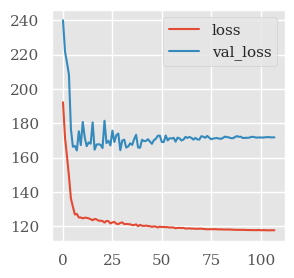

In [186]:
ANN_result = pd.DataFrame(model.history.history)
plt.style.use("ggplot")
ANN_result.plot(figsize=(3, 3))

In [187]:
y_pred_ANN = model.predict(x_test)
y_pred_ANN = list(y_pred_ANN.flatten())
y_pred_ANN = [0 if x < 0 else x for x in y_pred_ANN]

pr,_ = pearsonr(y_test, y_pred_ANN)
sr,_ = spearmanr(y_test, y_pred_ANN)

eval_dict = {'test size': 0.25,
              'MAE': '%.3f' %  metrics.mean_absolute_error(y_test, y_pred_ANN),
              'MSE': '%.3f' % metrics.mean_squared_error(y_test, y_pred_ANN),
              'RMSE': '%.3f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred_ANN)),
              'R2 Score': '%.3f' % metrics.r2_score(y_test, y_pred_ANN),
              'R': '%.3f' % np.sqrt(metrics.r2_score(y_test, y_pred_ANN)),
              'pearson': '%.3f' % pr,
              'spearmanr': '%.3f' % sr,
              }

5/5 [==============================] - 0s 3ms/step


In [ ]:
from matplotlib.offsetbox import AnchoredText
compare = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_ANN
})
# compare = compare.Predicted.apply(lambda x : x if x > 0 else 0)

rcParams['figure.figsize'] = 6, 5
fig = sns.regplot(data = compare, x = compare.Predicted, y = compare.Actual, color = 'navy')
text1 = f'R : {np.round(np.sqrt(metrics.r2_score(compare.Actual, compare.Predicted)), 3)}'+ '\n'+f'RMSE : {np.round(np.sqrt(metrics.mean_squared_error(compare.Actual, compare.Predicted)), 3)}'
# text2 = '\n'+ f'MAE : {np.round(metrics.mean_absolute_error(compare.Actual, compare.Predicted), 3)}'
# text3 = '\n' + f'spearmanr: {sr}'+ '\n'+ f'pearsonr: {pr}'
text = text1
anc = AnchoredText(text, loc="upper left", frameon=True, pad=0.4)
fig.add_artist(anc)
fig.title.set_size(15)
fig.title.set_fontweight('bold')
plt.savefig(f'{name_st}_Result_ANN', dpi=400)
plt.show()

In [189]:
(compare.mean()[0] - compare.mean()[1]) / compare.mean()[0]

0.21753343618333884

In [175]:
val = []
key = []
for i in eval_dict.values():
  val.append(i)
for j in eval_dict.keys():
  key.append(j)
eval_df = pd.DataFrame()
eval_df.insert(0, 'None', key)
eval_df.insert(1, 'value', val)
header_row = eval_df.iloc[0]
eval_df = pd.DataFrame(eval_df.values[1:], columns=header_row)
eval_df.to_csv(f'eval_df_ANN_{name_st}.csv')

In [176]:
eval_df

,test size,0.25
0,MAE,10.755
1,MSE,287.898
2,RMSE,16.968
3,R2 Score,0.227
4,R,0.476
5,pearson,0.493
6,spearmanr,0.670


# **Predict Pr Values For station By scenarios(SSP126 - SSP245 - SSP585)**

In [ ]:
dir = '/content/drive/MyDrive/CMIP6_Article/wavelet_Result/Final_Wavelet/'
name_st = 'ZOFRE_FLAVARJAN'

file_pass_126 = f'{name_st}_SSP126.csv'
file_pass_245 = f'{name_st}_SSP245.csv'
file_pass_585 = f'{name_st}_SSP585.csv'

In [ ]:
ssp_126 = pd.read_csv(dir+name_st+'/'+file_pass_126).drop('Unnamed: 0', axis=1)
ssp_245 = pd.read_csv(dir+name_st+'/'+file_pass_245).drop('Unnamed: 0', axis=1)
ssp_585 = pd.read_csv(dir+name_st+'/'+file_pass_585).drop('Unnamed: 0', axis=1)

In [ ]:
date = pd.read_csv('/content/drive/MyDrive/CMIP6_Article/date_sc.csv')

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)


model = Sequential()
model.add(Dense(32, input_shape=(X.shape[1],), activation = 'sigmoid'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))


model.add(Dense(1))
model.compile(optimizer = optimizer, loss='mean_squared_error')
model.fit(X, y, epochs = 500, batch_size = 1)

## **Predict pr based on ANN ssp126**

In [ ]:
n_com = 11

In [ ]:
x_pred_126 = ssp_126

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=n_com)
X_pca_pred_126 = pca.fit(x_pred_126)
X_pca_pred_126 = pca.transform(x_pred_126)
print("original shape:   ", x_pred_126.shape)
print("transformed shape:", X_pca_pred_126.shape)

original shape:    (312, 25)
transformed shape: (312, 11)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
X_126 = scaler.fit_transform(X_pca_pred_126)
X_126 = pd.DataFrame(X_126)

In [ ]:
y_pred_ANN_126 = model.predict(X_126)
y_pred_ANN_126 = list(y_pred_ANN_126.flatten())

10/10 [==============================] - 0s 2ms/step


In [ ]:
result_126 = pd.DataFrame({
    'year': date.year,
    'month': date.month,
    'predicted_pr': y_pred_ANN_126
})
result_126.predicted_pr = result_126.predicted_pr.apply(lambda x : x if x > 0 else 0)

<Axes: >

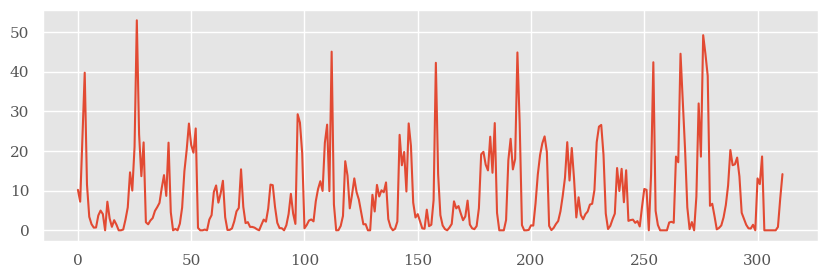

In [ ]:
rcParams['figure.figsize'] = 10, 3
result_126.predicted_pr.plot()

## **Predict pr based on ANN ssp245**

In [ ]:
x_pred_245 = ssp_245

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=n_com)
X_pca_pred_245 = pca.fit(x_pred_245)
X_pca_pred_245 = pca.transform(x_pred_245)
print("original shape:   ", x_pred_245.shape)
print("transformed shape:", X_pca_pred_245.shape)

original shape:    (312, 25)
transformed shape: (312, 11)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
X_245 = scaler.fit_transform(X_pca_pred_245)
X_245 = pd.DataFrame(X_245)

In [ ]:
y_pred_ANN_245 = model.predict(X_245)
y_pred_ANN_245 = list(y_pred_ANN_245.flatten())

10/10 [==============================] - 0s 2ms/step


In [ ]:
result_245 = pd.DataFrame({
    'year': date.year,
    'month': date.month,
    'predicted_pr': y_pred_ANN_245
})
result_245.predicted_pr = result_245.predicted_pr.apply(lambda x : x if x > 0 else 0)

<Axes: >

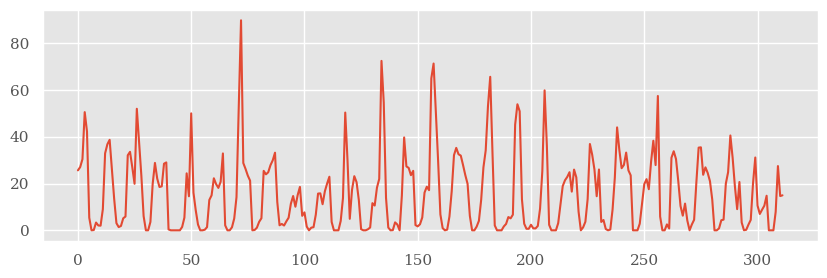

In [ ]:
rcParams['figure.figsize'] = 10, 3
result_245.predicted_pr.plot()

## **Predict pr based on ANN ssp585**

In [ ]:
x_pred_585 = ssp_585

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=n_com)
X_pca_pred_585 = pca.fit(x_pred_585)
X_pca_pred_585 = pca.transform(x_pred_585)
print("original shape:   ", x_pred_585.shape)
print("transformed shape:", X_pca_pred_585.shape)

original shape:    (312, 25)
transformed shape: (312, 11)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
X_585 = scaler.fit_transform(X_pca_pred_585)
X_585 = pd.DataFrame(X_585)

In [ ]:
y_pred_ANN_585 = model.predict(X_585)
y_pred_ANN_585 = list(y_pred_ANN_585.flatten())

10/10 [==============================] - 0s 3ms/step


In [ ]:
result_585 = pd.DataFrame({
    'year': date.year,
    'month': date.month,
    'predicted_pr': y_pred_ANN_585
})
result_585.predicted_pr = result_585.predicted_pr.apply(lambda x : x if x > 0 else 0)

<Axes: >

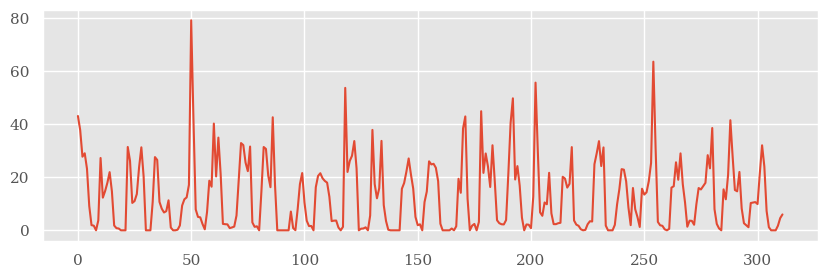

In [ ]:
rcParams['figure.figsize'] = 10, 3
result_585.predicted_pr.plot()

In [ ]:
resulf_Final = pd.DataFrame({
    'year': date.year,
    'month': date.month,
    'scenario_126': y_pred_ANN_126,
    'scenario_245': y_pred_ANN_245,
    'scenario_585': y_pred_ANN_585,
})
resulf_Final['scenario_126'] = resulf_Final['scenario_126'].apply(lambda x : x if x > 0 else 0)
resulf_Final['scenario_245'] = resulf_Final['scenario_245'].apply(lambda x : x if x > 0 else 0)
resulf_Final['scenario_585'] = resulf_Final['scenario_585'].apply(lambda x : x if x > 0 else 0)

resulf_Final.to_csv(f'{name_st}_SSPs.csv')

# **SSP Edit File**

## **SSP Low uncertainity percent**

In [ ]:
dir_montCarlo = '/content/drive/MyDrive/CMIP6_Article/MonteCarlo_Result/'

In [ ]:
Uncertainity = pd.read_csv(f'{dir_montCarlo}{name_st}_Uncertainity.csv').drop('Unnamed: 0', axis=1)

In [ ]:
Top_model = list((Uncertainity.sort_values(by = 'Uncertainity')[0:5]).Model)

In [ ]:
def add_date(df):
  date = pd.date_range(end=f'31/12/{2040}', periods=len(df))
  df.insert(0, 'Date', date)
  df.insert(1, 'year', df['Date'].dt.year)
  df.insert(2, 'month', df['Date'].dt.month)
  df.insert(3, 'day', df['Date'].dt.day)
  df.drop(['Date'], axis=1, inplace=True)
  return df

In [ ]:
ssp126_top_models = ssp_126[Top_model]
ssp245_top_models = ssp_245[Top_model]
ssp585_top_models = ssp_585[Top_model]

In [ ]:
ssp126 = add_date(ssp126_top_models)
ssp245 = add_date(ssp245_top_models)
ssp585 = add_date(ssp585_top_models)

In [ ]:
def daily_to_month(df):
  df = df.groupby(['year', 'month']).agg({Top_model[0]: np.sum, Top_model[1]: np.sum, Top_model[2]: np.sum,
                                             Top_model[3]: np.sum, Top_model[4]: np.sum})
  df_m = df.index.get_level_values('month')
  df_y = df.index.get_level_values('year')

  df.insert(0, 'month',df_m)
  df.insert(0, 'year',df_y)

  df.reset_index(drop=True, inplace=True)
  return df

In [ ]:
ssp126_m = daily_to_month(ssp126)
ssp245_m = daily_to_month(ssp245)
ssp585_m = daily_to_month(ssp585)

## **Save dataframe to exctract Subseries**

In [ ]:
ssp126_m.to_csv(f'ssp126_monthly_{name_st}.csv')
ssp245_m.to_csv(f'ssp245_monthly_{name_st}.csv')
ssp585_m.to_csv(f'ssp585_monthly_{name_st}.csv')

In [ ]:
!zip df_st_ZOFRE_FLAVARJAN.zip *_monthly_*.csv